In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import dask.dataframe as dd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/glade/p/cisl/aiml/ggantos/HWT/mode_cnn_hm_201103/neuron_activations_cnn_20200504_000_val.csv')
df.time = df.time.astype('datetime64[ns]').reset_index(drop=True) - pd.Timedelta(6, 'H') # convert to datetime64 object and offset from UTC time by 6 hours
df.describe()

,index,centroid_lon,centroid_lat,centroid_i,centroid_j,track_id,track_step,neuron_000,neuron_001,neuron_002,neuron_003,neuron_004,neuron_005,neuron_006,neuron_007,neuron_008
count,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000,187184.000000
mean,93591.500000,-91.936123,38.184899,512.676789,953.536413,760.630828,1.831417,-0.000842,-0.000278,-0.003808,-0.003342,-0.001967,-0.002242,0.526896,0.934041,-0.000078
std,54035.510731,9.784797,5.036332,185.785259,279.046159,512.925881,1.223256,0.000006,0.000001,0.000055,0.000049,0.000029,0.000028,0.128169,0.084499,0.000001
min,0.000000,-124.432205,24.692507,41.000000,49.000000,0.000000,1.000000,-0.000958,-0.000283,-0.005010,-0.004362,-0.002601,-0.002862,-0.371576,-0.137918,-0.000097
25%,46795.750000,-98.237195,34.247490,365.000000,768.000000,337.000000,1.000000,-0.000842,-0.000278,-0.003809,-0.003344,-0.001967,-0.002243,0.524440,0.940843,-0.000079
50%,93591.500000,-90.886940,37.986687,507.000000,982.000000,692.000000,1.000000,-0.000841,-0.000278,-0.003792,-0.003329,-0.001959,-0.002234,0.569623,0.960003,-0.000078
75%,140387.250000,-85.001309,42.037640,659.000000,1159.000000,1109.000000,2.000000,-0.000841,-0.000278,-0.003781,-0.003318,-0.001954,-0.002228,0.596158,0.968440,-0.000078
max,187183.000000,-67.522270,49.320774,944.000000,1538.000000,2443.000000,19.000000,-0.000751,-0.000250,-0.003770,-0.003308,-0.001932,-0.002223,0.695392,1.098153,-0.000060


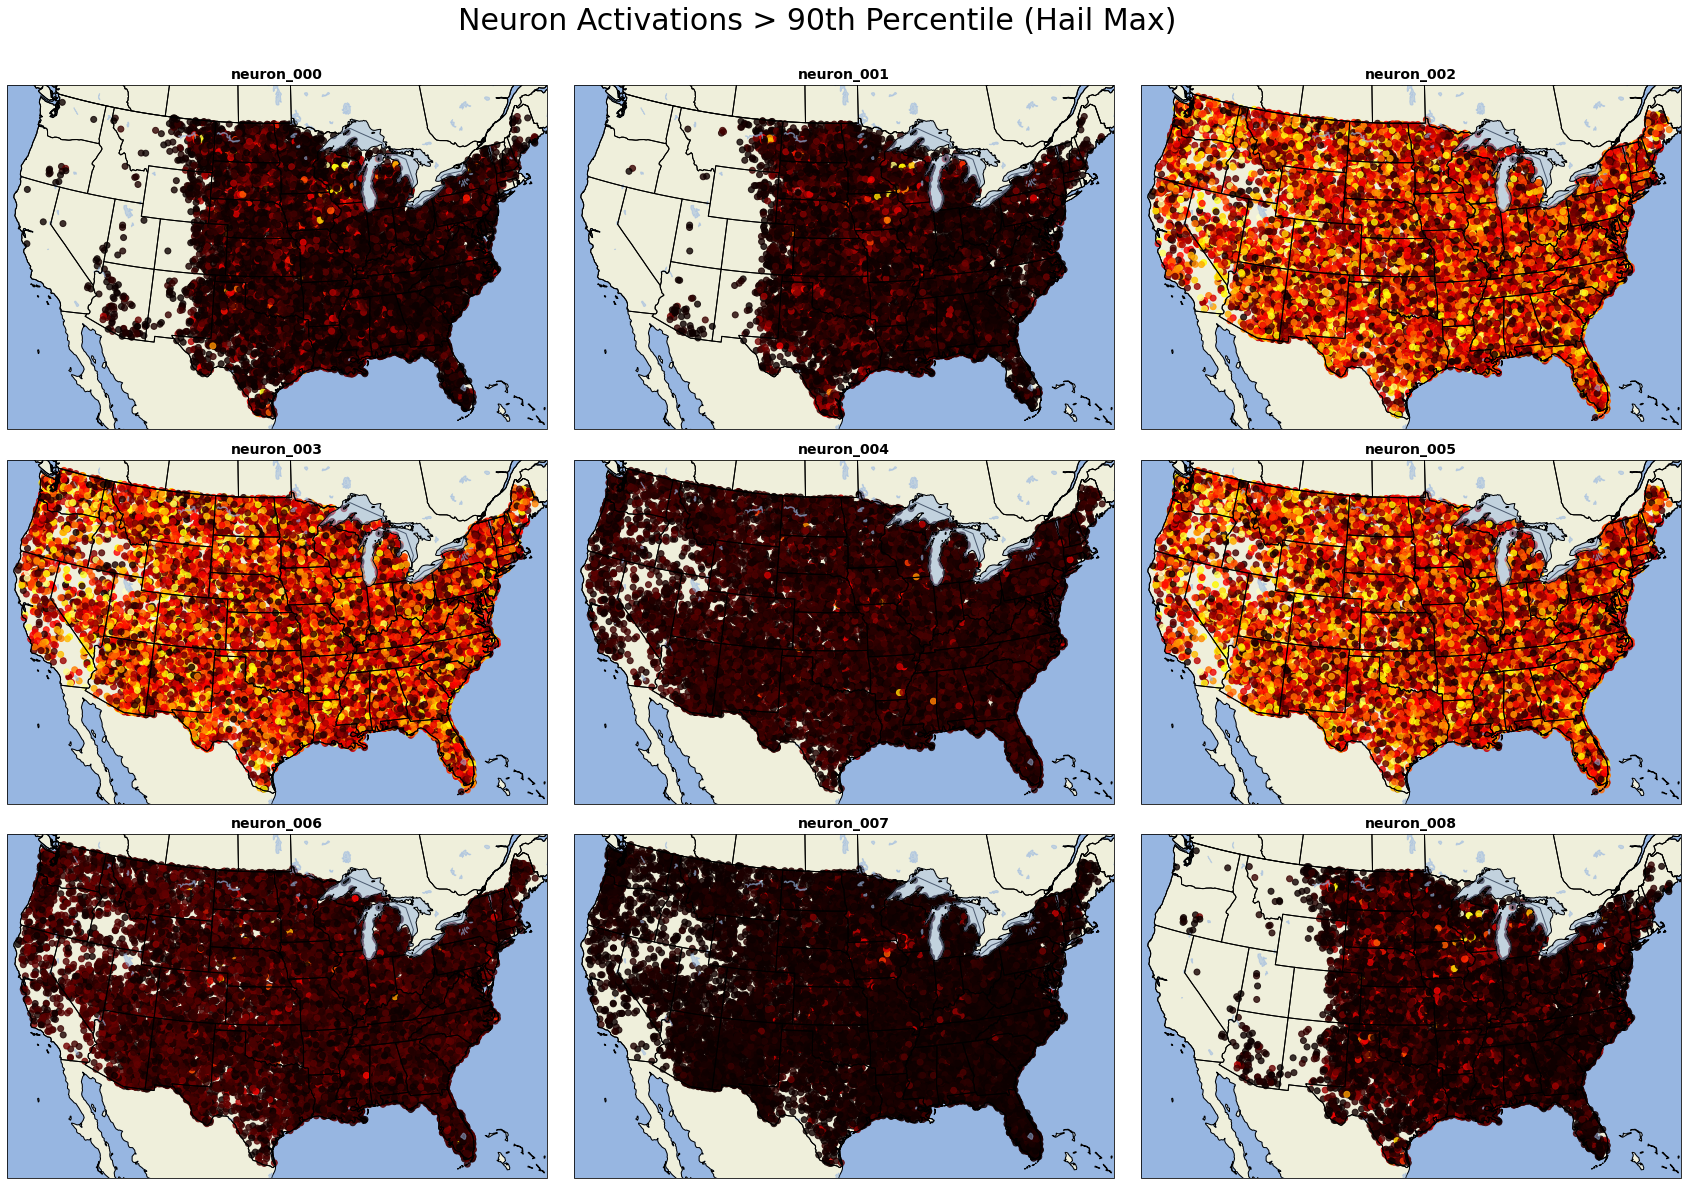

In [3]:
lcc = ccrs.LambertConformal(central_longitude=-97.5, standard_parallels=(38.5, 38.5))
fig, axes = plt.subplots(3,3, figsize=(30, 19.6), sharex=True, sharey=True, subplot_kw={'projection': lcc})
plt.subplots_adjust(wspace=0.05, hspace=-0.1)
neurons = list(df.columns[-9:])
for i, ax in enumerate(axes.ravel()):
    ax.set_extent([-120, -74, 25, 50], crs=ccrs.PlateCarree()) 
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    
    neuron = neurons[i]
    #data = df[df[neuron] < df[neuron].quantile(0.1)]
    data = df[df[neuron] > df[neuron].quantile(0.90)]
    var = data[neuron]
    #vmax = data.iloc[:,-4:].max().max()
    #vmin = data.iloc[:,-4:].min().min()
    vmin = var.quantile(0)
    vmax = var.quantile(1)
    im = ax.scatter(data['centroid_lon'], data['centroid_lat'], c=var, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), alpha=0.8, cmap='hot')
    ax.set_title(neuron, fontsize=14, fontweight='bold')
    
#fig.subplots_adjust(right=0.87)
#cbar_ax = fig.add_axes([0.88, 0.132, 0.015, 0.74])
#fig.colorbar(im, cax=cbar_ax)
fig.suptitle('Neuron Activations > 90th Percentile (Hail Max)', fontsize=30)
fig.subplots_adjust(top=0.95)
fig.savefig('../images/Storms_greater90p_hm.png', bbox_inches='tight')

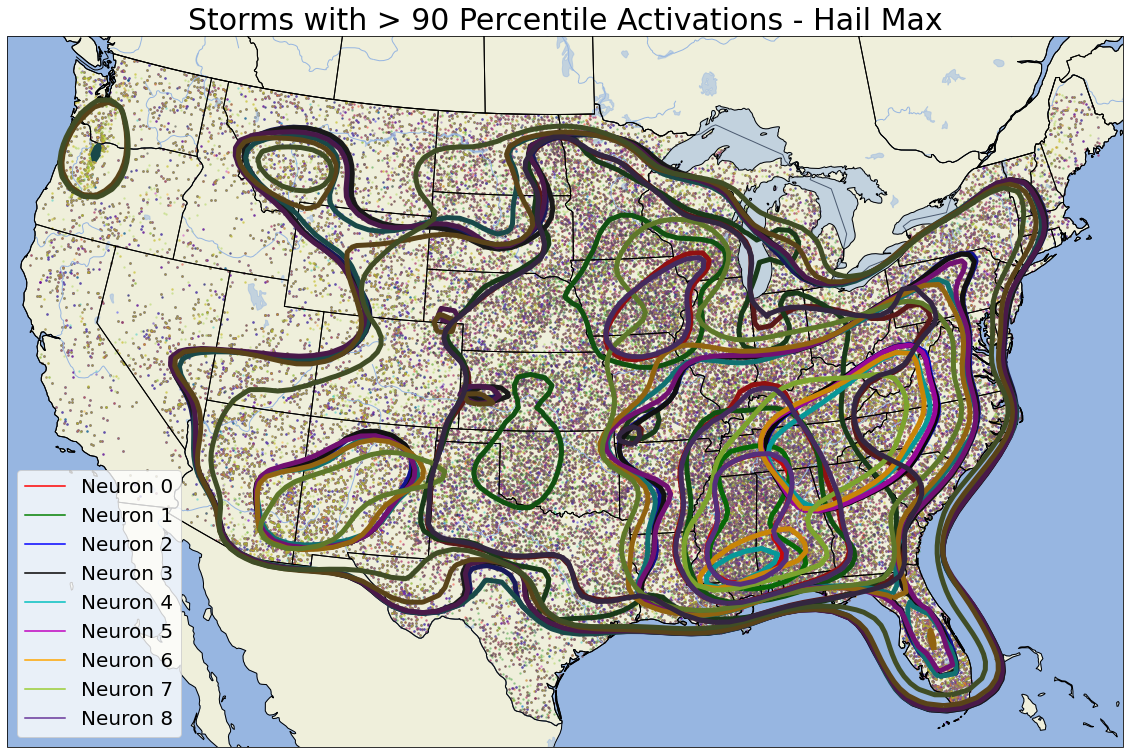

In [4]:
neurons = list(df.columns[-9:])
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']
fig = plt.figure(figsize=(20, 16))
lcc = ccrs.LambertConformal(central_longitude=-97.5, standard_parallels=(38.5, 38.5))
ax = fig.add_subplot(1, 1, 1, projection=lcc)
ax.set_extent([-120, -74, 25, 50], crs=ccrs.PlateCarree()) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)

for i in range(9):
    neuron = neurons[i]
    data = df[df[neuron] > df[neuron].quantile(0.9)]
    #data = df[df[neuron] > 0.1]
    var = data[neuron]
    plt.scatter(data['centroid_lon'], data['centroid_lat'], transform=ccrs.PlateCarree(), label=None, color=col[i], alpha=0.25, s=2.5)
    sns.kdeplot(data['centroid_lon'], data['centroid_lat'], levels=3, transform=ccrs.PlateCarree(), linewidths=5, thresh=0, color=col[i], linestyles='-',
                label=f'Neuron {i}', cummulative=True)
    plt.legend(prop={'size': 20})
plt.title('Storms with > 90 Percentile Activations - Hail Max', fontsize=30)
fig.savefig('../images/ML_Storms_greater90_hm.png', bbox_inches='tight')

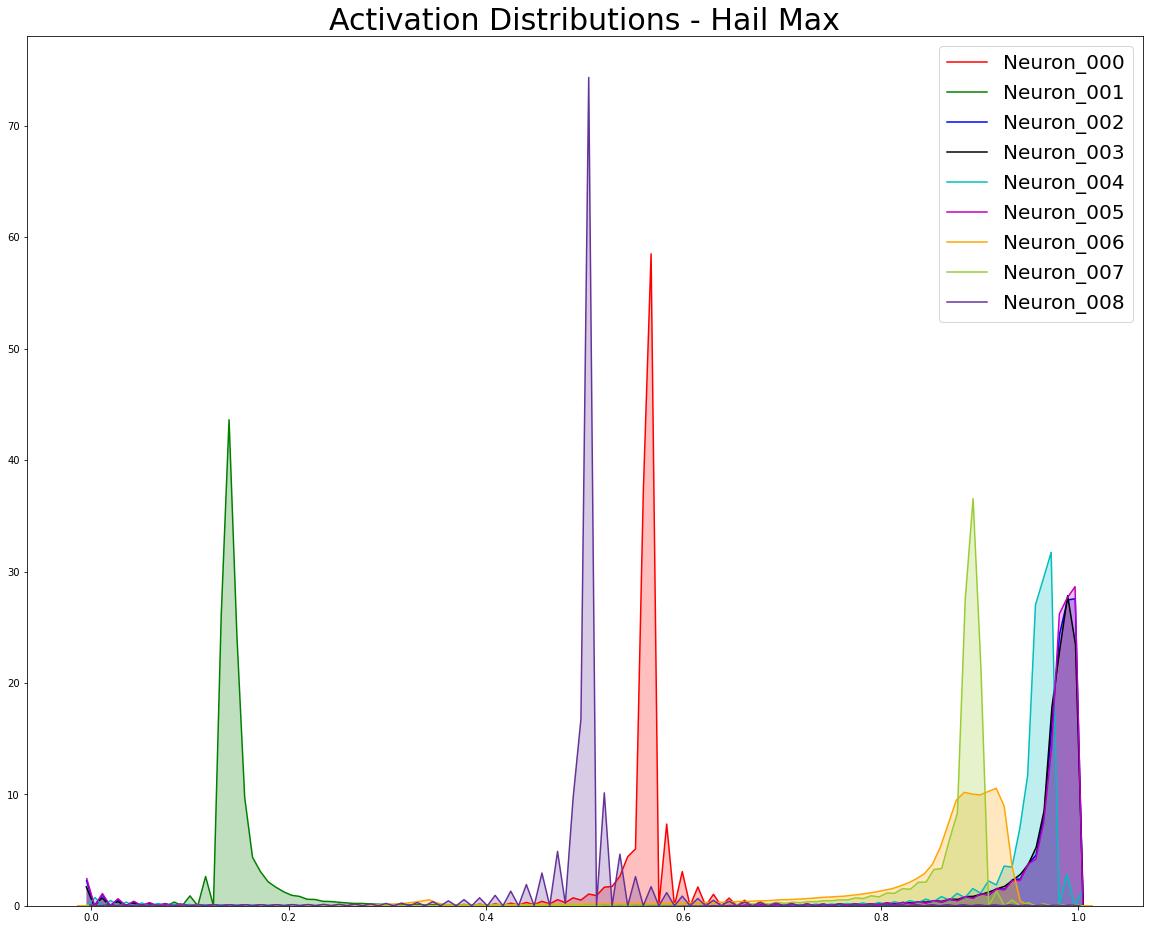

In [5]:
scaler = MinMaxScaler()
s_data = df.iloc[:, -9:]
#s_data = s_data[s_data['neuron_003'] > s_data['neuron_003'].quantile(0.90)]
sdf = pd.DataFrame(scaler.fit_transform(s_data), columns=s_data.columns)
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']

plt.figure(figsize=(20,16))
for i in range(9):
    sns.kdeplot(sdf.iloc[:,i], shade=True, label=f'Neuron_00{i}', color=col[i])
    plt.legend(prop={'size': 20})
plt.ylabel('')
plt.xlabel('')
plt.title('Activation Distributions - Hail Max', fontsize=30)
plt.savefig('../images/kde_dist_hm.png', bbox_inches='tight')

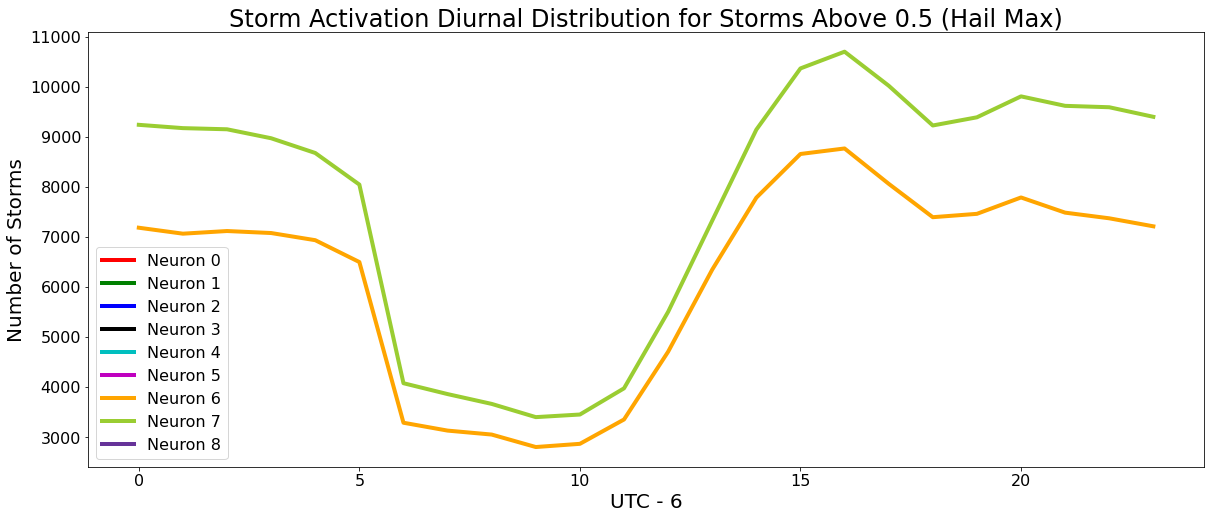

In [6]:
neurons = list(df.columns[-9:])
dff = pd.DataFrame(columns=neurons)
fig, ax = plt.subplots(figsize=(20,8))
col = ['r', 'g', 'b', 'k', 'c', 'm', 'orange', 'yellowgreen', 'rebeccapurple']

for i in range(9):
    neuron = neurons[i]
    #d = df[df[neuron] > df[neuron].quantile(0.50)].groupby(df['time'].dt.hour)[neuron].count()
    d = df[df[neuron] > 0.5].groupby(df['time'].dt.hour)[neuron].count()
    dff[neuron] = d
    im = ax.plot(dff[neuron], linewidth=4, alpha=1, label=f'Neuron {i}', color=col[i])
plt.legend(prop={'size': 16})
plt.title('Storm Activation Diurnal Distribution for Storms Above 0.5 (Hail Max)', fontsize=24)
ax.set_ylabel('Number of Storms', fontsize=20)
ax.set_xlabel('UTC - 6', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.savefig('../images/Diurnal_g50p_hm.png', bbox_inches='tight')

In [7]:
neurons = df.columns[-9:]
l, ids = [], []
for n in neurons:
    t = df[df[n] == df[n].max()]['time'] + pd.Timedelta(6, 'H')
    i = df[df[n] == df[n].max()]['track_id']
    l.append(t)
    ids.append(i)

l, ids

([84293   2014-06-04 04:00:00
  Name: time, dtype: datetime64[ns],
  110880   2014-06-17
  Name: time, dtype: datetime64[ns],
  85245   2014-06-04 20:00:00
  Name: time, dtype: datetime64[ns],
  85245   2014-06-04 20:00:00
  Name: time, dtype: datetime64[ns],
  68911   2014-05-26 22:00:00
  Name: time, dtype: datetime64[ns],
  124353   2014-06-21 23:00:00
  Name: time, dtype: datetime64[ns],
  83604   2014-06-04 04:00:00
  Name: time, dtype: datetime64[ns],
  148662   2014-06-30 20:00:00
  Name: time, dtype: datetime64[ns],
  84293   2014-06-04 04:00:00
  Name: time, dtype: datetime64[ns]],
 [84293    109
  Name: track_id, dtype: int64,
  110880    501
  Name: track_id, dtype: int64,
  85245    629
  Name: track_id, dtype: int64,
  85245    629
  Name: track_id, dtype: int64,
  68911    1122
  Name: track_id, dtype: int64,
  124353    706
  Name: track_id, dtype: int64,
  83604    870
  Name: track_id, dtype: int64,
  148662    213
  Name: track_id, dtype: int64,
  84293    109
  Name: